<a href="https://colab.research.google.com/github/gakurujnr/Financial-Inclusion-Dataset/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Peter_Gakuru_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## All Imports

In [0]:
##
###
# All imports
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns

import pandas_profiling


## Reading the Dataset

In [85]:
##
## 
# Loading the Data from the source 
# ---
# Dataset: http://bit.ly/FinancialDataset
# ---
proj = pd.read_csv("http://bit.ly/FinancialDataset")
proj.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Checking Data

In [86]:
##
## Determining the no. of records in our dataset
proj.shape

(23524, 13)

In [87]:
##
## no of records
len(proj)

23524

In [88]:
##
## Checking whether each column has an appropriate datatype
proj.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [89]:
##
## Checking the information of our dataset
proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [90]:
##
## Pandas profiling 
import pandas_profiling
pandas_profiling.ProfileReport(proj)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [91]:
##
## Looking at the columns
proj.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [92]:
##
## Looking at the unique figure, value or objects in columns
proj.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [93]:
##
proj.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [94]:
##
##
proj['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [95]:
##
##
proj['Has a Bank account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [96]:
##
proj['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [97]:
##
proj['Cell Phone Access'].unique()

array(['Yes', 'No', nan], dtype=object)

In [98]:
##
proj['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [99]:
##
proj['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [100]:
##
proj['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

In [101]:
##
proj['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [102]:
##
proj['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [103]:
##
proj['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [104]:
##'Type of Job'
proj['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

## Tidying the dataset

In [105]:
## Mean for age
proj['Respondent Age'].mean()

38.804299702000854

In [106]:
##
##
proj['Respondent Age'].mode()

0    30.0
dtype: float64

In [107]:
##
proj['year'].mode()

0    2016
dtype: int64

In [108]:
##
##
proj.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [109]:
##
## Checking missing values
proj.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# ##
# Sorting null values by dropping null values
proj = proj.dropna()

In [111]:
## Checking if there is null values after dropping null values
proj.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [112]:
proj.head(1)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


## Exploratory Analysis

### Handling Missing Values

In [113]:
##
## Renaming, replacing and writing columns in lower case
proj.columns = proj.columns.str.lower().str.replace(' ', '_')
proj.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
##
## Renaming columns
proj.rename(columns = {"has_bank_account": "bank_account", "the_relathip_with_head": "relationship_with_head", "level_of_educuation": "level_of_education"}, inplace = True)


In [115]:
proj.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [0]:
# ##
# ## replacing categorical variables with the mode
# cols = ['country', 'has_a_bank_account', 'type_of_location', 'cell_phone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']
# proj[cols] = proj[cols].fillna(proj.mode().iloc[0])

In [0]:
# ##
# ## Replacing missing values of numerical variables with there means
# meme = ['household_size', 'respondent_age', 'year']
# proj[meme] = proj[meme].fillna(proj.mean().iloc[0])

In [0]:
##
## drop the uniqueid
# proj.drop('uniqueid', axis = 1, inplace = True)

In [119]:
proj.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

### Outliers

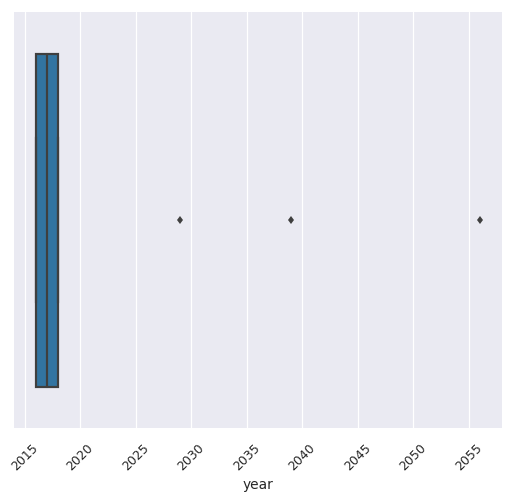

In [120]:
# Checking for outliers
plt.figure(dpi = 90, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(proj.year)
plt.xticks(rotation = 45)
plt.show()

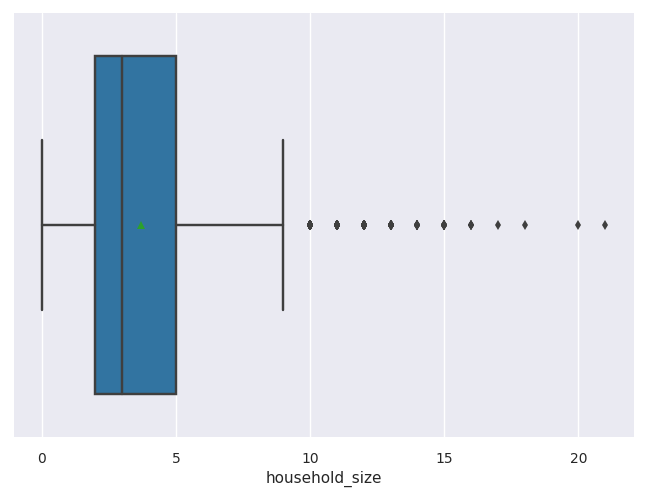

In [121]:
##
##
## FInding outliers using seaborn for numerical variables
sns.boxplot(proj['household_size'], showmeans = True)

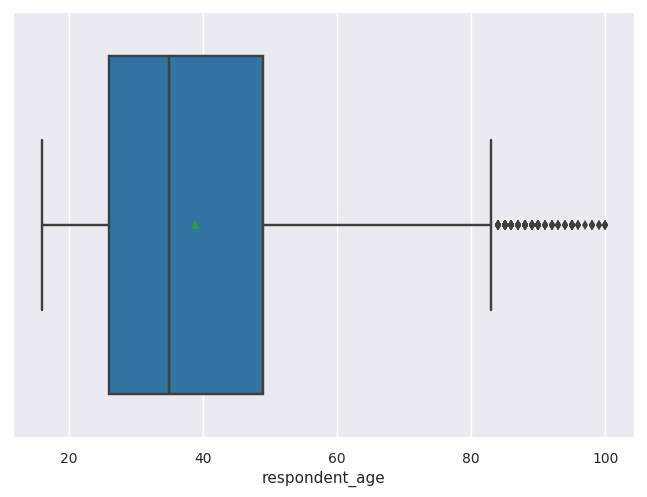

In [122]:
## FInding outliers using seaborn for numerical variables
##
sns.boxplot(proj['respondent_age'], showmeans = True)

I won't drop outliers of respondent age as the maximum is 100

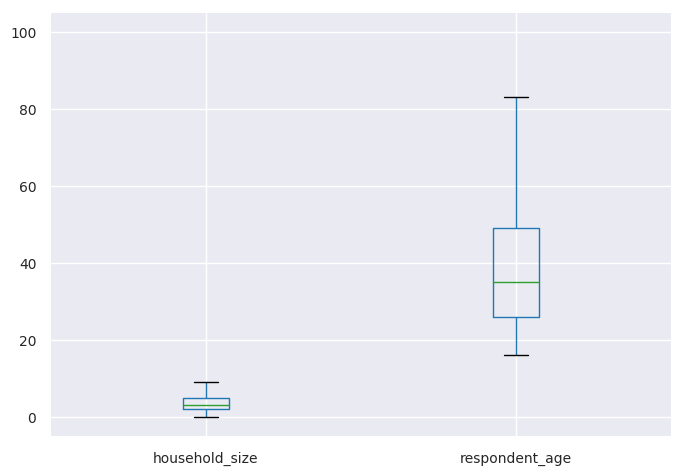

In [123]:
##
## Check for outliers
# boxplot = df.boxplot(grid=False, rot=45, fontsize=15)
boxplot = proj.boxplot(["household_size","respondent_age"])
plt.show()

### Anomalies

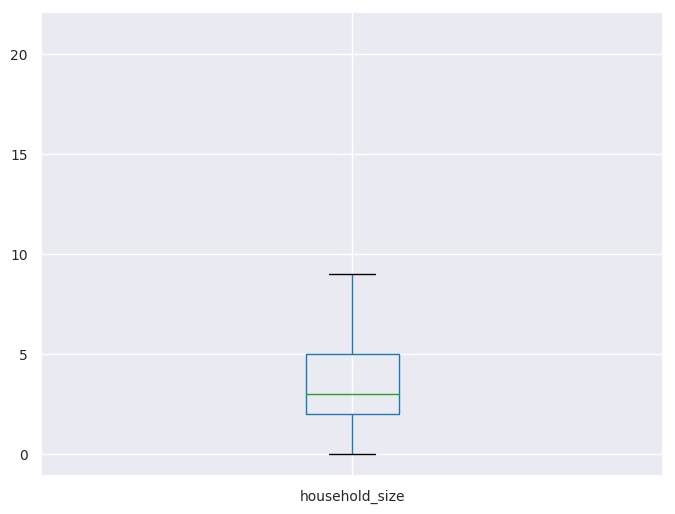

In [124]:
##
# Anomalies detected in household_size size
proj[['household_size']].boxplot(figsize=(8,6))

### Dropping values and columns

In [0]:
# Ensuring that you are dealing with years between 2016 and 2018
#
l = proj[proj['year']>2019].index

proj.drop(l,inplace=True)

In [126]:
##
#
proj.year.unique()

array([2018, 2016, 2017])

In [0]:
# dropping the uniqueid column due to the high cardinality in it's values
proj = proj.drop(columns = ['uniqueid'])

In [128]:
proj.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [129]:
##
##
# Univariate analysis
proj.groupby('country').household_size.mean()

country
Kenya       3.987133
Rwanda      4.482782
Tanzania    1.931692
Uganda      4.983771
Name: household_size, dtype: float64

In [130]:
proj.groupby('country').household_size.median()

country
Kenya       4.0
Rwanda      4.0
Tanzania    2.0
Uganda      5.0
Name: household_size, dtype: float64

In [131]:
proj.groupby('country').household_size.std()

country
Kenya       2.334967
Rwanda      1.980386
Tanzania    1.055155
Uganda      2.893811
Name: household_size, dtype: float64

In [132]:
proj.groupby('country').household_size.count()

country
Kenya       6062
Rwanda      8683
Tanzania    6500
Uganda      2095
Name: household_size, dtype: int64

In [133]:
##
proj.groupby('level_of_education').household_size.count()

level_of_education
6                                     27
No formal education                 4467
Other/Dont know/RTA                    8
Primary education                  12688
Secondary education                 4206
Tertiary education                  1143
Vocational/Specialised training      801
Name: household_size, dtype: int64

### Plotting Univariate and Bivariate

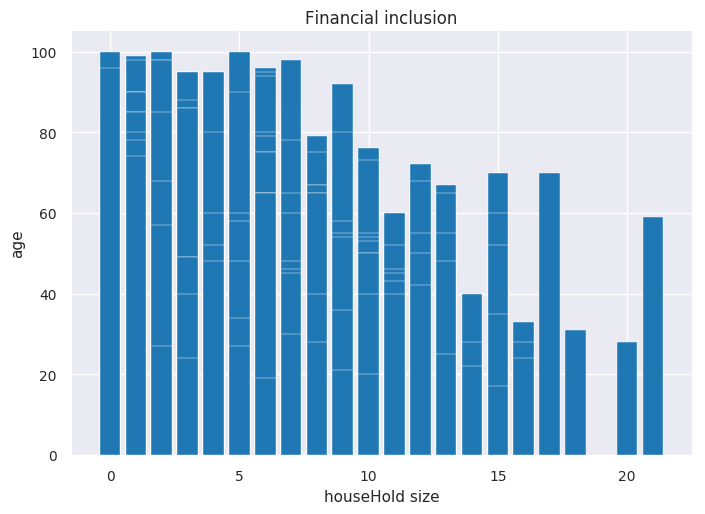

In [134]:
# Plot univariate and bivariate summaries recording your observations.
x = proj['household_size']
age = proj["respondent_age"]
plt.bar(x, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion")
plt.show()

In [135]:
## check correlation
#
proj["respondent_age"].corr(proj["household_size"])


-0.11967115234154871

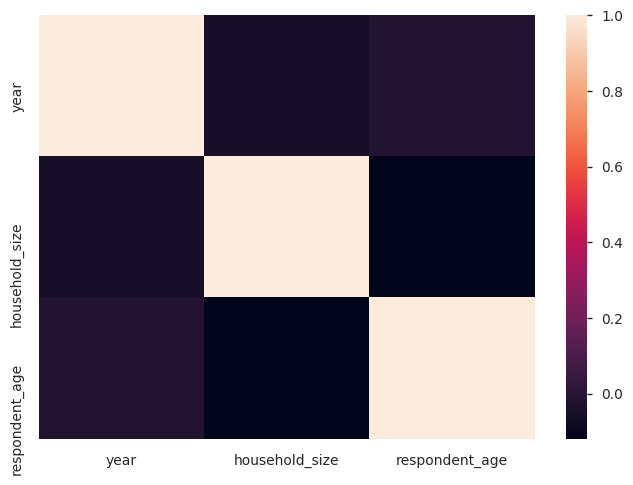

In [164]:
# Plot the correlation using a heatmap.
# The black colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
# ---
sns.heatmap(proj.corr())

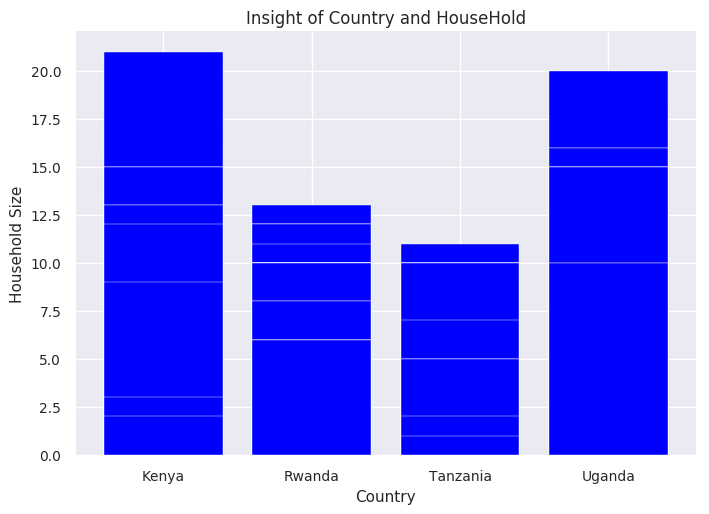

In [136]:
##
##
# seeing the relation of countries and the household_size
# Defining our data
country = proj['country']
house =  proj["household_size"]
plt.bar(country, house, color='blue')
# Labelling our x axis
plt.xlabel("Country")
# Labelling our y axis
plt.ylabel("Household Size")
# Giving a title to our Bar chart
plt.title("Insight of Country and HouseHold")
# Displaying our chart
plt.show()

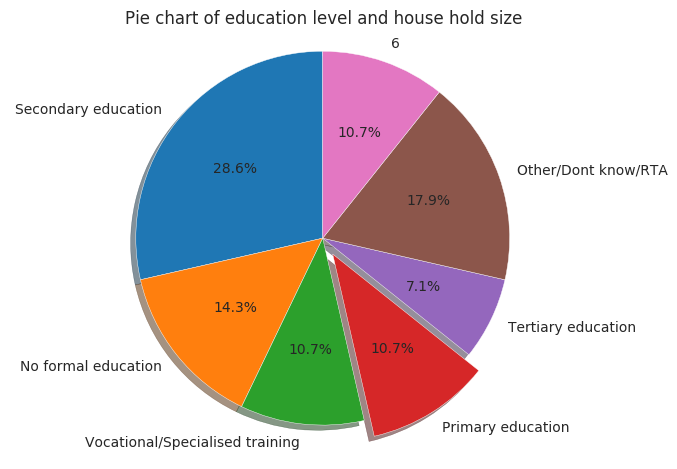

In [137]:
##
## Pie chart for house hold and education level

hls = proj["household_size"].sample(7)
edl = proj["level_of_education"].unique().tolist()
explode = [0, 0, 0, 0.1, 0, 0, 0]

plt.pie(hls, explode=explode, labels=edl, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of education level and house hold size')
plt.show()

Primary educationl has the highest houusehold size while cocational/specialised training has the lowest in our sample

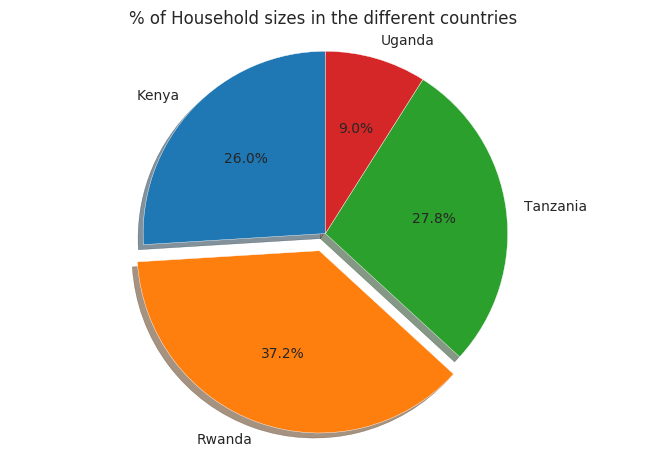

In [138]:
# Distribution of household sizes by count with country
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0, 0.1, 0, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()

Rwanda has the largest number of household counts while Uganda has the lowest. I exploded Rwanda with the highest household size

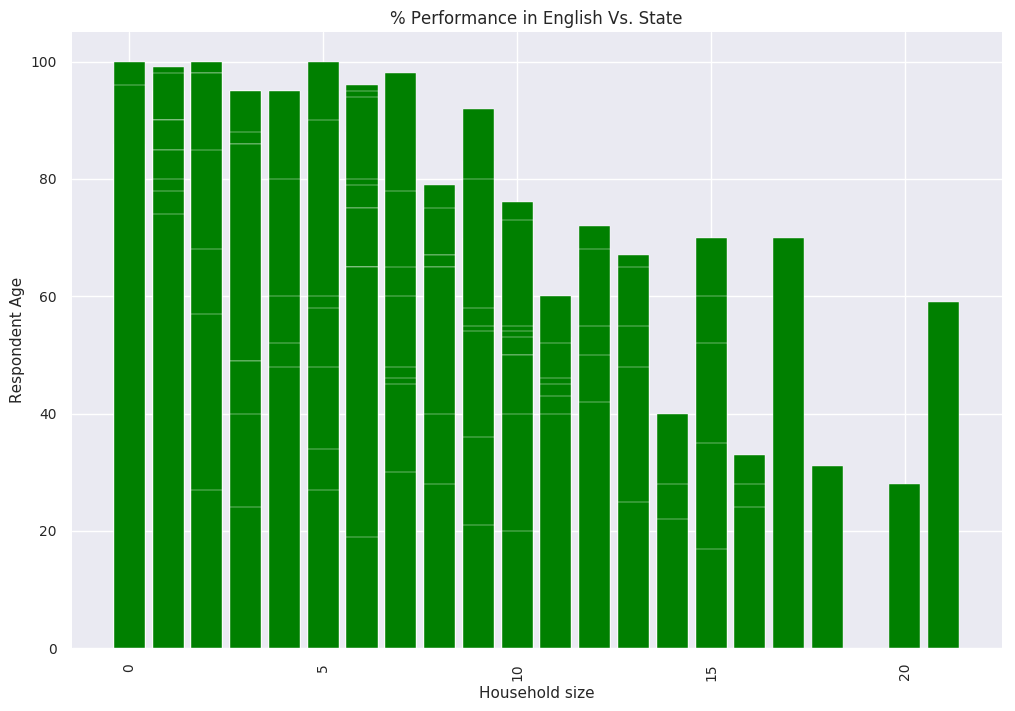

In [139]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(proj.household_size, proj.respondent_age, color='green')
plt.xticks(rotation=90)
ax.set_xlabel('Household size')
ax.set_ylabel('Respondent Age')
plt.title('% Performance in English Vs. State')
plt.show()

### Histogram

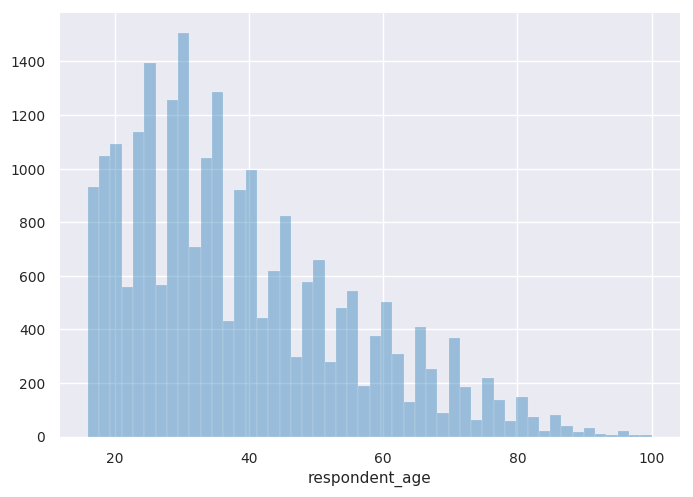

In [140]:
# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(proj.respondent_age, kde = False)

As the age increases the count decreases

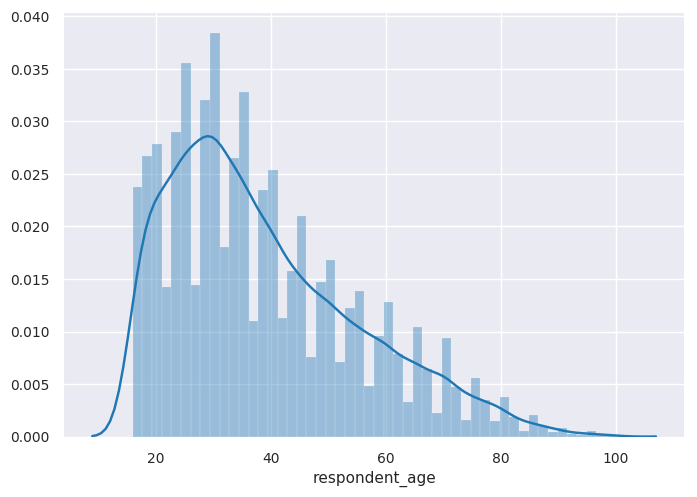

In [141]:
# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(proj.respondent_age, kde = True)

This shows the smooth curve that tell as that as the respondent age increases the frequency decrease

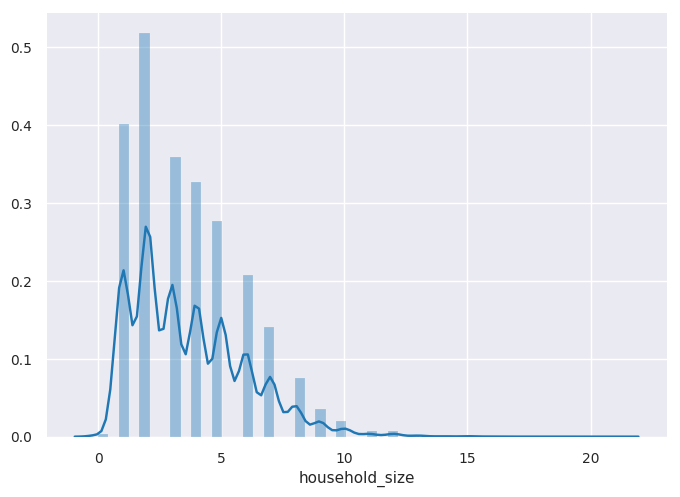

In [142]:
##
# PLotting histogram while dropping values
sns.distplot(proj.household_size.dropna());

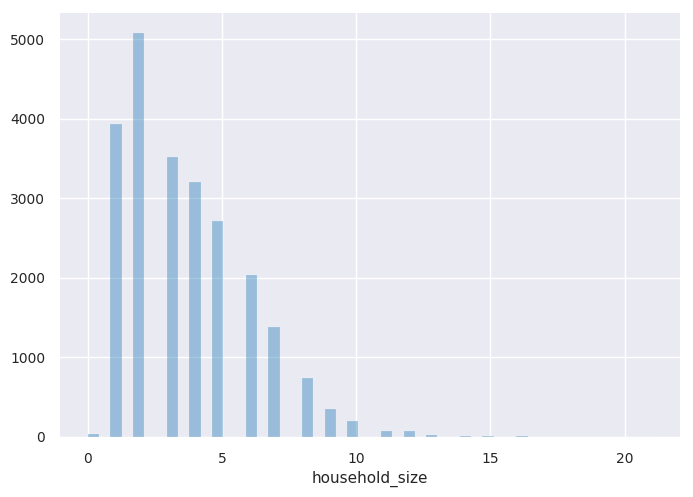

In [143]:
# Plotting a histogram of the household size
#

sns.distplot(proj.household_size, kde = False)

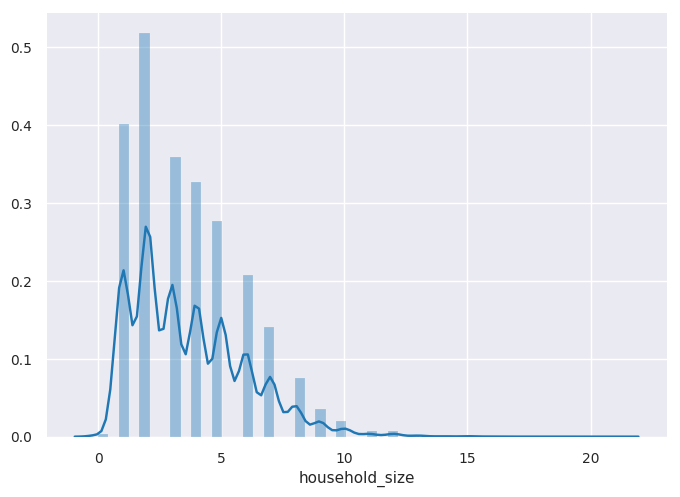

In [144]:
# Plotting a histogram of the household size
#

sns.distplot(proj.household_size, kde = True)

This smooth curve on the histogram shows as that the household size fluctuates with the frequencies but eventually frequency decreases at the end as size increases

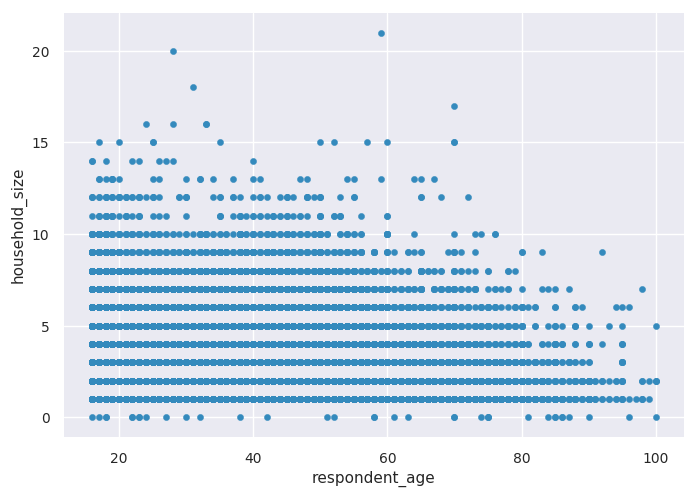

In [145]:
##
## Scatter plot for household size and the respondent age
#
proj.plot(x='respondent_age', y='household_size', kind='scatter')

This Has no correlation as the plots are scattered everywhere

In [146]:
project = proj.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
project

gender_of_respondent
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

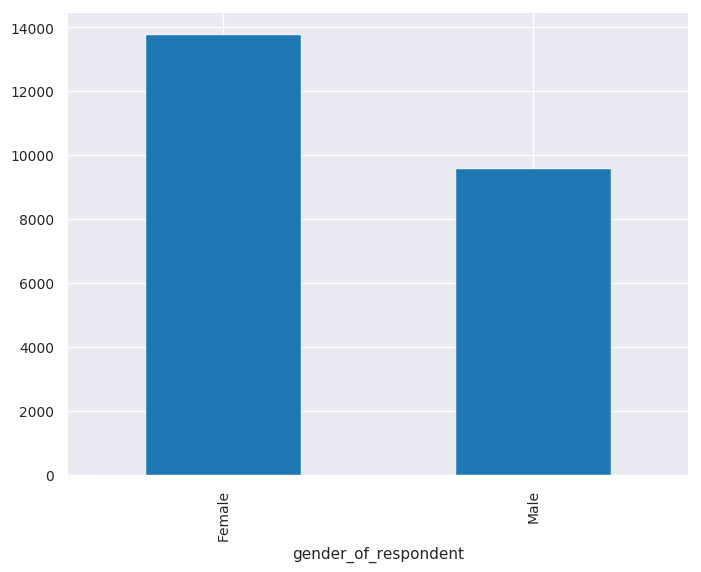

In [147]:
project.plot(kind='bar', figsize=(8, 6))
plt.show()

There were more female than male  in the dataset

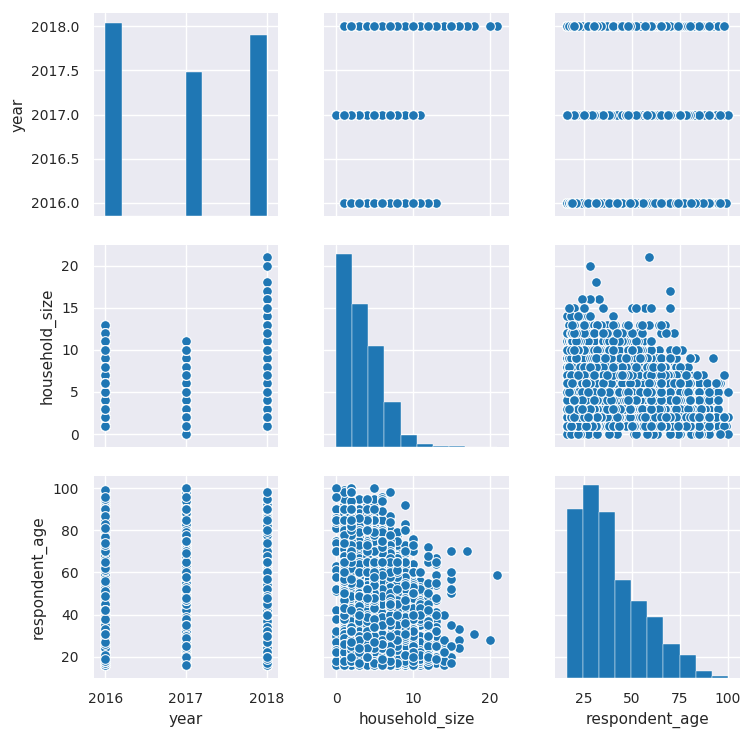

In [165]:
# Creating a pairplot to build histograms and scatter plots.
# ---
sns.pairplot(proj)

The pairs plot builds on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single variable
while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

### Multivariate Analysis

In [0]:
## Preprocessing
##
x = proj.drop('has_a_bank_account', 1)
y = proj['has_a_bank_account']

In [149]:
##
##
# Encoding the categorical columns
x = pd.get_dummies(x)
x.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
##

# Splitting the dataset into the Training set and Test set

#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [151]:
x_train.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
21308,2017,1.0,45.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
19670,2017,2.0,33.0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
22965,2018,7.0,36.0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
17830,2017,1.0,16.0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
22284,2018,8.0,31.0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [152]:
x_test.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
2631,2018,1.0,33.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8380,2016,6.0,22.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9488,2016,5.0,19.0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
31,2018,5.0,38.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1186,2018,1.0,48.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
##
# Standardizing
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [154]:
x_test

array([[ 1.20207548, -1.17433718, -0.35120743, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.01082455, -1.01769419, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  0.5737922 , -1.19946331, ..., -0.22160018,
        -0.34761413, -0.61143302],
       ...,
       [-1.15548487, -0.30027249, -1.13887361, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689,  1.16353523, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548, -1.17433718,  2.61768817, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [155]:
x_train

array([[ 0.0232953 , -1.17433718,  0.37586905, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 0.0232953 , -0.73730484, -0.35120743, ..., -0.22160018,
        -0.34761413,  1.63550211],
       [ 1.20207548,  1.44785689, -0.16943831, ..., -0.22160018,
        -0.34761413,  1.63550211],
       ...,
       [-1.15548487, -0.73730484,  2.49650876, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.44785689,  0.25468963, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689, -0.47238684, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [156]:
##
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train

array([[-0.22482777,  2.13920581,  0.66451616, ..., -0.1137306 ,
        -0.01519024,  0.57646328],
       [ 3.38531755, -2.69177387,  0.86333899, ..., -0.1587818 ,
        -0.06145493,  0.22448762],
       [-0.59223634,  1.81241658, -0.88860301, ...,  0.23855451,
         0.0321537 , -0.47805148],
       ...,
       [-1.02698951,  1.1357574 ,  3.72374391, ..., -0.6569727 ,
        -0.46770021,  2.56021084],
       [-2.63710863, -0.03927488, -0.73283394, ..., -0.1566391 ,
        -0.30123859,  0.45754463],
       [-1.51501427, -1.52134305, -1.85497273, ..., -0.47471793,
         0.11713997,  0.57057795]])

In [157]:
##
## Getting the explained variance ratio

ex_variance = pca.explained_variance_ratio_
ex_variance


array([0.10171163, 0.07253785, 0.06972458, 0.06247519, 0.05166259,
       0.04624466, 0.04015419, 0.03564433, 0.03487714, 0.03116651,
       0.02975091, 0.02710112, 0.02627195, 0.02523953, 0.02503204,
       0.02476803, 0.02467043, 0.024296  , 0.02415896, 0.02392125,
       0.02372821, 0.02327924, 0.02208826, 0.02111412, 0.01971555,
       0.01924303, 0.01542758, 0.01323842])

In [0]:
# The PCA Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [159]:
# Training and Making Predictions.
# 
## Our ensemle method is Random Forest as it best with huge data
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(x_train, y_train)

y_pred = clas.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [160]:
# Performance Evaluation
#  This is by using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cons = confusion_matrix(y_test, y_pred)
print(cons)

[[4034    2]
 [ 610   22]]


In [161]:
##
## This is performance evaluation using  accuracy score
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

Accuracy 0.8688946015424165


This shows that the accuracy is 0.86889 which is the same as 86% that means the model is predicted around the mean

In [162]:
## Results with two principal components
##
pc = PCA(n_components=1)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test)
# 
clas1 = RandomForestClassifier(max_depth=2, random_state=0)
clas1.fit(x_train, y_train)

y_pred = clas1.predict(x_test)
# 
conf = confusion_matrix(y_test, y_pred)
print(conf)
print(accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
0.8646101113967438


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


There is no significant reduction observed in the classification accuracy using the 1 pricncipal component as compared to and using principal component 2

In [163]:
# Results with Full Feature Set 
# To do so, we simply remove the PCA part
# 
# OUR CODE GOES HERE
from sklearn.metrics import accuracy_score


print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

Accuracy 0.8646101113967438



The accuracy received with full feature set should also be 86.889% which is not far apart from 86.46%